##Enviroment setup

In [1]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# #Create the requirements.txt to install the necessary libraries
# %pip freeze> requirements.txt
# %pip install -r requirements.txt


In [3]:
!pip install gluoncv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00


In [4]:
%pip install numpy==1.23.5
%pip install mxnet -f https://dist.mxnet.io/python/cpu

Looking in links: https://dist.mxnet.io/python/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [5]:
%pip install gluoncv --upgrade
# native
%pip install -U --pre mxnet -f https://dist.mxnet.io/python/mkl
# cuda 10.2
%pip install -U --pre mxnet -f https://dist.mxnet.io/python/cu102mkl


Looking in links: https://dist.mxnet.io/python/mkl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: mxnet
    Found existing installation: mxnet 1.9.1
    Uninstalling mxnet-1.9.1:
      Successfully uninstalled mxnet-1.9.1
Looking in links: https://dist.mxnet.io/python/cu102mkl


In [6]:
%pip install -U 'mxnet>=1.4.0,<2.0.0'

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Attempting uninstall: mxnet
    Found existing installation: mxnet 2.0.0b1
    Uninstalling mxnet-2.0.0b1:
      Successfully uninstalled mxnet-2.0.0b1


In [7]:
%pip install tqdm


In [8]:
#%pip uninstall torch


In [9]:
%pip install 'torch>=1.4.0,<2.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which

In [10]:
# #check env
# %run check_env.ipynb
# check_env()

In [11]:
#Check if we are running on the correct environment
import os
#os.environ['VIRTUAL_ENV']

In [12]:
%pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-ve26q0mm
  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-ve26q0mm
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=331982 sha256=12c7b2fee80ea3fe3ee92468ca3411d036e6a97251618970e7b3073b21f8e2e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-onc_95fi/wheels/8e/1a/5f/0c984ae3d65a4d7da4ba3407d2a8d8c8e85dd55f84d4936f04
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [13]:
#Ignore warnings for a cleaner code
import warnings
warnings.filterwarnings("ignore")

import pycocotools

In [14]:
#Imports part
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils
import mxnet as mx
from pathlib import Path
import random
from skimage import io
from pycocotools.coco import COCO
import matplotlib.patches as patches
import time
from tqdm import tqdm
import matplotlib.patches as mpatches

In [77]:
#Its important to keep in mind that colab only supports inline plots.
%matplotlib inline

### Importing CoCo Dataset
Done with the library dependencies. Time to create the classification models we will be using for our experiment.
From COCO's documentation:

"The file path should be like:
/your_path/coco/val2017 and /your_path/coco/annotations
The environment variable DATA_DIR is /your_path/coco
dataset is val2017 by default."


In [ ]:
#Download from kaggle our cocodataset
%pip install -q kaggle
from google.colab import files
path_to_token = r"C:\Users\saraf\Project_Master_Thesis/kaggle.json"
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

! kaggle datasets download -d awsaf49/coco-2017-dataset

! mkdir kaggle_data

In [16]:
coco_data_path = "/kaggle/input/coco-2017-dataset/coco2017/val2017/"
coco_data_path

'/kaggle/input/coco-2017-dataset/coco2017/val2017/'

In [ ]:
import zipfile
!unzip /content/coco-2017-dataset.zip -d /content/coco-2017-dataset

In [18]:
%rm coco-2017-dataset.zip

In [60]:
ROOT_DIR = Path.cwd()
VAL_PATH = Path("/content/coco-2017-dataset/coco2017/val2017")
ann_file_path= Path("/content/coco-2017-dataset/coco2017/annotations/instances_val2017.json")
print("ROOT_DIR::",ROOT_DIR)
print("ann_file::",ann_file_path)
print("VAL_PATH::",VAL_PATH)

ROOT_DIR:: /content
ann_file:: /content/coco-2017-dataset/coco2017/annotations/instances_val2017.json
VAL_PATH:: /content/coco-2017-dataset/coco2017/val2017


In [47]:
coco_ann = COCO(ann_file_path)
img_ids = coco_ann.getImgIds() # load all validation set ids
print(type(img_ids),img_ids[555])

loading annotations into memory...
Done (t=1.15s)
creating index...
index created!
<class 'list'> 552371


In [61]:
# function to get random image from validation set and it's annotaions through COCO API
def get_rand_img():
    #Get some random in img_ids (list)
    img_id = random.choice(img_ids)
    img_metadata = coco_ann.loadImgs([img_id])
    #Create the str img data to PathPosix
    path_to_img = Path(img_metadata[0]['file_name'])
    print("Path_to_image::",path_to_img)
    #Read the whole Path
    img = io.imread(VAL_PATH/path_to_img)
    ann_ids = coco_ann.getAnnIds(imgIds=[img_id])
    anns = coco_ann.loadAnns(ann_ids)
    #Return the img and the random annotation id
    return img,anns

In [ ]:
img, anns = get_rand_img()
type(img), img.shape, type(anns),anns

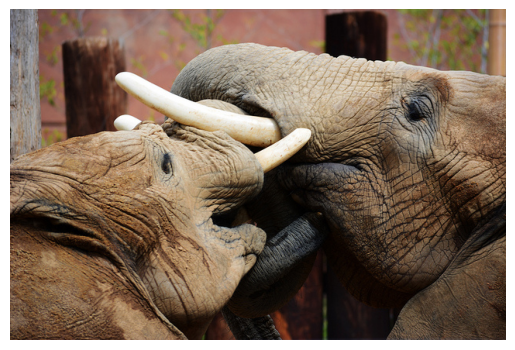

In [83]:
#print the random image. Run the above and this cell some times.
plt.axis('off')
plt.imshow(img)
plt.show()

## Model Creation
Here we are going to import and create the pre-trained models, through the libraries we imported. We need to take care of the dependencies of some of the libraries.
- MXNet is working with mxnet.ndarry type, so we will need to convert our images (ndarray) to mxnet.ndarry
- Afterwards, continue with transforming all the images into tensors as network inputs then we will apply a normalization layer.

In [84]:
#Import our timer() class here
%run timer_class.ipynb
timer = Timer()

Related [documantation](https://cv.gluon.ai/api/utils.html) for gluoncv.utils

In [87]:
# create_test_model function. Kinda self explanatory.
def create_test_model(model,img):
  #convert the image to compatible mx_image
  mx_img = mx.nd.array(img)
  x,original_img = data.transform.presets.rcnn.transform.test(mx_img)

  timer.start()

  box_ids, scores, bboxes = model(x)
  t = timer.stop()

  # image with model bounding boxes, scores and ids
  ax = utils.viz.plot_bbox(original_img, bboxes[0], scores[0], box_ids[0], class_names=model.classes)
  return ax,t

### Model_1 Faster R-Cnn (Two stage)

*   Breif Two stage based model where, first the model learn how to extract Region of proposals, then for every Region of proposal fe perform the normal Fast R-CNN network from ROIpooling then from fully connected layer compute the two losses one for object box (regression), and one for class type (classification).

Each network has its own loss functions and the whole system weights consider the both losses path, and during the test the network needs first to identify the ROI and apply Object detection technique, so Faster R-CNN consider slower than one stage models but have better mAP.

The backbone network is usually a dense convolutional network like ResNet or VGG16



Related [doc] (https://cv.gluon.ai/model_zoo/detection.html)


In [88]:
#Download a pre-trained model rcnn
rcnn = model_zoo.get_model('faster_rcnn_resnet50_v1b_coco', pretrained=True)

123472KB [00:03, 34033.50KB/s]                            


In [92]:
# bounding box is defined by four values in pixels [x_min, y_min, width, height]
def display_ground_truth(image,boxes):
    cpy_img = image.copy()
    fig, ax = plt.subplots()
    ax.imshow(cpy_img)
    for box in boxes:
        color_list = ["darkgreen","teal","red","aqua","orangered","magenta","lime","khaki","chocolate","crimson","azure"]
        rect = patches.Rectangle((int(box['bbox'][0]), int(box['bbox'][1])), int(box['bbox'][2]), int(box['bbox'][3]), linewidth=1, edgecolor=random.choice(color_list), facecolor='none')
        ax.add_patch(rect)
    ax.set_title("Ground Truth")
    plt.axis("off")
    plt.show()

Path_to_image:: 000000417043.jpg


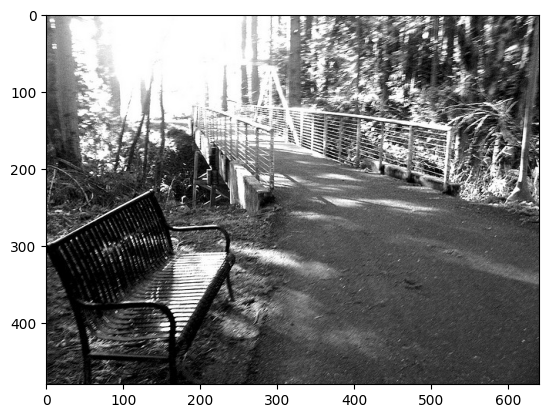

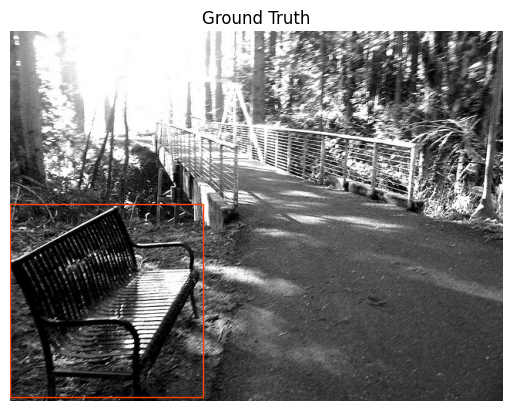

In [93]:
#Let's try the aboce function
img,anns = get_rand_img()
plt.imshow(img)
display_ground_truth(img,anns)

In [94]:
#Test our model
ax,t = create_test_model(rcnn,img)
ax.set_title("Faster R-CNN \n time elapsed: ",t)
plt.show()

AttributeError: ignored

In [21]:
# Unmount your Google Drive
#drive.flush_and_unmount()